<a href="https://colab.research.google.com/github/iqbalamo93/Clustering/blob/master/Fish_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
url ='https://raw.githubusercontent.com/iqbalamo93/Datasets/master/fish.csv'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from sklearn.datasets import load_iris

In [4]:
df=pd.read_csv(url,header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [6]:
df[0].unique()

array(['Bream', 'Roach', 'Smelt', 'Pike'], dtype=object)

In [7]:
dc=df.iloc[:,1:]

In [8]:
dc.head()

,1,2,3,4,5,6
0,242.0,23.2,25.4,30.0,38.4,13.4
1,290.0,24.0,26.3,31.2,40.0,13.8
2,340.0,23.9,26.5,31.1,39.8,15.1
3,363.0,26.3,29.0,33.5,38.0,13.3
4,430.0,26.5,29.0,34.0,36.6,15.1


In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [10]:
scaler = StandardScaler()
dc = scaler.fit_transform(dc)

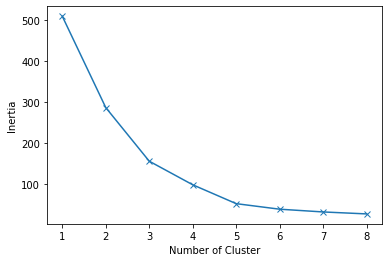

In [11]:
inertia  = []
for x in range(1,9):
  model =  KMeans(n_clusters=x, random_state=1)
  model.fit(dc)
  inertia.append(model.inertia_)
plt.plot(range(1,9),inertia,marker='x')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')
plt.show()

In [12]:
model = KMeans(n_clusters=4)
pipeline = make_pipeline(scaler,model)
pipeline.fit(dc)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=4, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [ ]:
labels = pipeline.predict(dc)
labels = pd.Series(labels)
data_cros=pd.concat([labels,df.iloc[:,0]],axis=1)
data_cros.columns=['labels','names']

In [15]:
pd.crosstab(data_cros['labels'], data_cros['names'])

names,Bream,Pike,Roach,Smelt
labels,,,,
0,33,0,1,0
1,0,0,0,13
2,0,17,0,0
3,1,0,19,1
